In [1]:
import pandas as pd
from dtwParallel import dtw_functions
from scipy.spatial import distance as d
import numpy as np
import matplotlib.pyplot as plt
import pycm

In [87]:
df = pd.read_csv('../Data/for_dtw.csv')
# convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
# if date is gt '2022-01-25', (value-1000)/10000, else, value/10000
#df['value'] = np.where(df['date'] >= '2022-01-25', (df['value']-1000)/10000, df['value']/10000)
df['value'] = df['value']/10000
dates = sorted(df['date'].unique())
ids = sorted(df['ID'].unique())
template = pd.DataFrame({'date': dates})

bands = ['B02', 'B03', 'B04', 'B08']


In [104]:
for id in ids:
    l = []
    di = {}
    for band in bands:
        df_temp = pd.merge(template, df[(df['ID']==id) & (df['band']==band)], how='left', on=['date'])

        df_temp['value'] = df_temp['value'].interpolate(method='linear')
        df_temp['value'] = df_temp['value'].ffill()
        df_temp['value'] = df_temp['value'].bfill()
        df_temp = df_temp[(df_temp['date'] >= '2021-05-01') & (df_temp['date'] <= '2022-04-30')]
        if band == 'B02':
            # convert datetime to string
            di['date'] = df_temp['date'].dt.strftime('%Y-%m-%d').tolist()
        # l.append({f'{band}':df_temp['value'].values})
        di[f'{band}'] = df_temp['value'].values
    df_temp = pd.DataFrame(di)
    df_temp.to_csv(f'../Data/filled/{id}.csv', index=False)

In [2]:
train = pd.read_csv('../Data/train.csv')
train_ids = train['ID']
train_ids = sorted(train_ids.unique())

In [3]:
test = pd.read_csv('../Data/test.csv')

In [4]:
test

,ID,ndvi_Jan,ndvi_Feb,ndvi_Mar,ndvi_Apr,ndvi_May,ndvi_Jun,ndvi_Jul,ndvi_Aug,ndvi_Sep,...,b08May,b08Jun,b08Jul,b08Aug,b08Sep,b08Oct,b08Nov,b08Dec,b08_pen,specie
0,1322,0.541885,0.439218,0.371011,0.308668,0.481706,0.536705,0.492905,0.459245,0.448025,...,0.212708,0.256711,0.270507,0.263992,0.243342,0.229884,0.220860,0.208108,0.002494,almond
1,1327,0.421935,0.456480,0.436791,0.370414,0.648758,0.692628,0.626890,0.581000,0.570145,...,0.223150,0.270490,0.284846,0.274226,0.254212,0.236884,0.223708,0.206540,0.001950,almond
2,1597,0.489014,0.418273,0.398186,0.381671,0.586977,0.582200,0.544148,0.525200,0.513600,...,0.237191,0.272452,0.287060,0.280435,0.258210,0.247157,0.231914,0.210890,0.001828,almond
3,1598,0.385424,0.348320,0.363707,0.403177,0.583431,0.541425,0.507171,0.484951,0.462384,...,0.249727,0.277931,0.294509,0.286393,0.269765,0.266608,0.252408,0.238477,0.002565,almond
4,1130,0.315581,0.301457,0.299178,0.269283,0.469358,0.631154,0.636000,0.615927,0.612631,...,0.281232,0.336612,0.349274,0.327149,0.298756,0.263991,0.235786,0.227953,0.004024,almond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2231,-1.000000,-0.992566,-0.992327,-0.944039,-0.724257,-0.633192,-0.491295,-0.445237,-0.385633,...,0.010161,0.014067,0.021091,0.021987,0.024418,0.024206,0.025747,0.020555,0.004039,water
476,1796,-0.984948,-0.975456,-0.970317,-0.983937,-0.859528,-0.665855,-0.618292,-0.723490,-0.666197,...,0.003301,0.007580,0.007441,0.004968,0.006679,0.009697,0.011465,0.009944,0.000673,water
477,1776,0.002187,0.000229,-0.001808,-0.031450,-0.542481,-0.328776,-0.255979,-0.204180,-0.397543,...,0.000140,0.003930,0.010374,0.012481,0.008700,0.008860,0.006300,0.005201,0.001659,water
478,2237,-0.476439,-1.000000,-0.966514,-0.994845,-0.861964,-0.526690,-0.582591,-0.558093,-0.497019,...,0.003056,0.012985,0.011553,0.008482,0.012703,0.015350,0.015216,0.014758,0.003955,water


In [5]:
# keep only unique ID
# test = test.drop_duplicates(subset=['ID'])

In [6]:
# count number of occurences of each specie
test['specie'].value_counts()

specie
almond                  30
avocado                 30
barren                  30
barren shadowed         30
forage                  30
industrial grape        30
lemon                   30
mandarin                30
olive                   30
orange                  30
riverside vegetation    30
short cycle crop        30
table grape             30
urban                   30
walnut                  30
water                   30
Name: count, dtype: int64

In [220]:
# skip

val = pd.read_csv('../Data/val.csv')

# keep only unique ID
val = val.drop_duplicates(subset=['ID'])

# get species with less than 30 occurences
tofill = 30 - test['specie'].value_counts()

# get the list of species to fill
tofill = tofill[tofill > 0].index.to_list()

# fill
for specie in tofill:
    # get validation occurences of the specie
    val_temp = val[val['specie'] == specie]
    # get the number of occurences of the specie in test
    m = test[test['specie'] == specie].shape[0]
    # get the number of occurences to fill
    k = 30 - m
    # sample over val_temp
    val_temp = val_temp.sample(k)
    # append the ids to test
    test = pd.concat([test, val_temp], ignore_index=True)

# count number of occurences of each specie
test['specie'].value_counts()

In [7]:
# add a new id column to test
test['nID'] = test.index + 1


In [8]:
test_ids = test['nID']
test_ids = sorted(test_ids.unique())

In [9]:
train.shape

(1600, 67)

In [10]:
# remove duplicates in train
train.drop_duplicates(['ID']).shape

(1215, 67)

In [11]:
db = train[['ID', 'specie']]

In [12]:
db_test = test[['nID','ID', 'specie']]

In [13]:
def load_and_transform(id, db):
    df = pd.read_csv(f'../Data/filled/{id}.csv')
    df = df.drop('date', axis=1).to_numpy().transpose()
    specie = db[db['ID'] == id]['specie'].to_list()[0]
    return df, specie


In [23]:
def load_and_transform_ndvi(id, db):
    df = pd.read_csv(f'../Data/filled/{id}.csv')
    df.loc[:, 'ndvi'] = (df['B08'] - df['B04']) / (df['B08'] + df['B04'])
    df = df.drop(['B02', 'B03', 'B04', 'B08'], axis=1)
    df = df.drop('date', axis=1).to_numpy().transpose()
    specie = db[db['ID'] == id]['specie'].to_list()[0]
    return df, specie

In [20]:
tid = db_test[db_test['nID'] == 1]['ID'].to_list()[0]
X, specie_x = load_and_transform_ndvi(tid, db_test)

In [15]:
results = []

for i in test_ids:
    tid = db_test[db_test['nID'] == i]['ID'].to_list()[0]
    X, specie_x = load_and_transform(tid, db_test)
    for id in train_ids:
        Y, specie_y = load_and_transform(id, db)
        score = dtw_functions.dtw(X, Y, type_dtw="d", local_dissimilarity=d.euclidean, MTS=True)
        results.append({'id': i,'id_test': tid, 'id_train': id, 'specie_test': specie_x, 'specie_train': specie_y, 'score': score})
    print(f'{i} done')


/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexp

KeyboardInterrupt: 

In [291]:
dfr = pd.DataFrame(results)

In [293]:
dfr

,id,id_test,id_train,specie_test,specie_train,score
0,1,1322,2,almond,olive,0.486597
1,1,1322,3,almond,olive,0.444548
2,1,1322,4,almond,olive,0.550083
3,1,1322,7,almond,olive,0.603357
4,1,1322,11,almond,olive,0.425929
...,...,...,...,...,...,...
583195,480,2234,2673,water,riverside vegetation,2.459488
583196,480,2234,2677,water,riverside vegetation,2.420637
583197,480,2234,2678,water,riverside vegetation,2.271317
583198,480,2234,2682,water,riverside vegetation,2.150672


In [294]:
# group by id_test and keep the min score row
dfr2 = dfr.groupby(['id']).apply(lambda x: x[x['score'] == x['score'].min()])

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/2512928937.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr2 = dfr.groupby(['id']).apply(lambda x: x[x['score'] == x['score'].min()])


In [295]:
dfr2 = dfr2.reset_index(drop=True)

In [296]:
dfr2.head()

,id,id_test,id_train,specie_test,specie_train,score
0,1,1322,1305,almond,almond,0.205963
1,2,1327,1319,almond,almond,0.138544
2,3,1597,1601,almond,almond,0.278345
3,4,1598,1596,almond,almond,0.305271
4,5,1130,1137,almond,almond,0.319072


In [297]:
# create a dictionary to convert labels to integers
labels = sorted(dfr2['specie_test'].unique())
labels_dict = dict(zip(labels, range(len(labels))))

In [298]:
labels_dict

{'almond': 0,
 'avocado': 1,
 'barren': 2,
 'barren shadowed': 3,
 'forage': 4,
 'industrial grape': 5,
 'lemon': 6,
 'mandarin': 7,
 'olive': 8,
 'orange': 9,
 'riverside vegetation': 10,
 'short cycle crop': 11,
 'table grape': 12,
 'urban': 13,
 'walnut': 14,
 'water': 15}

In [299]:
# convert labels to integers
dfr2['specie_test'] = dfr2['specie_test'].map(labels_dict)
dfr2['specie_train'] = dfr2['specie_train'].map(labels_dict)

In [300]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = 10,10

In [301]:
# inverse key for value in the following dictionary
labels_dict2 = {v: k for k, v in labels_dict.items()}

In [302]:
cm = pycm.ConfusionMatrix(actual_vector=dfr2['specie_test'].tolist(), predict_vector=dfr2['specie_train'].tolist())

In [303]:
cm.relabel(mapping=labels_dict2)

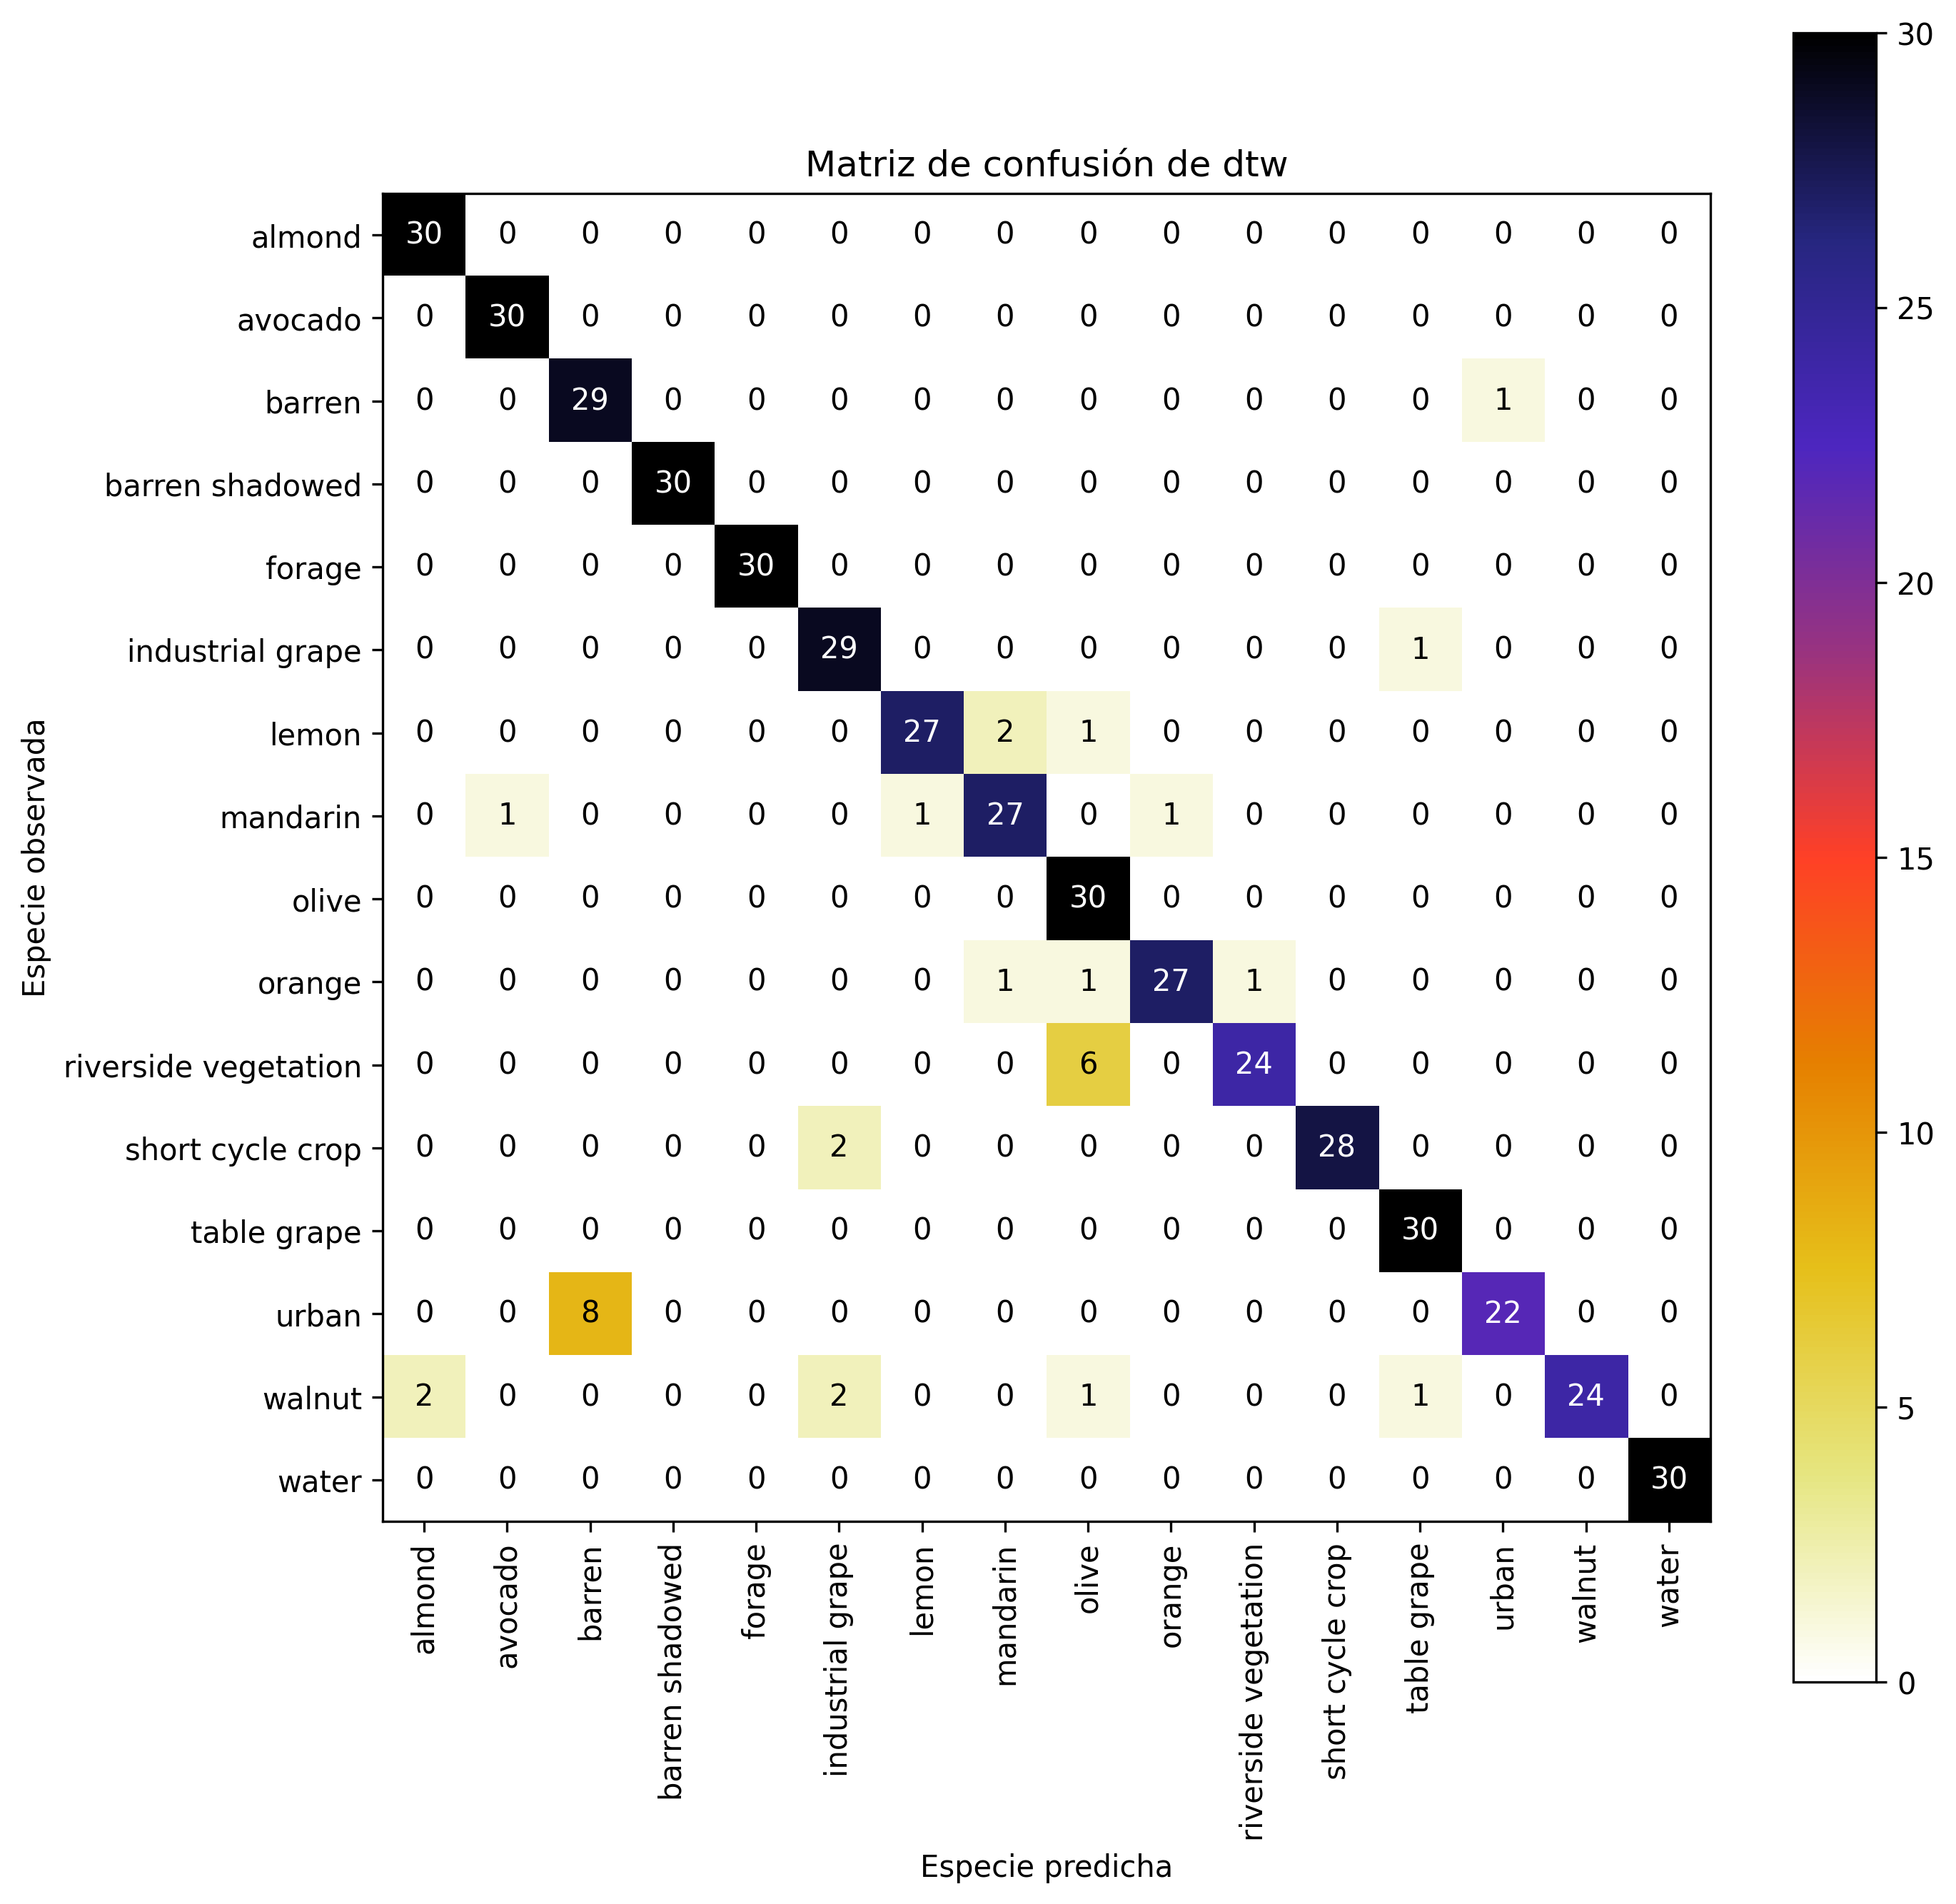

In [304]:
cm.plot(cmap=plt.cm.CMRmap_r, number_label=True, plot_lib="matplotlib")
plt.xticks(rotation=90)
plt.title('Matriz de confusión de dtw')
plt.xlabel('Especie predicha')
plt.ylabel('Especie observada')
plt.show()

In [305]:
cm.overall_stat

{'Overall ACC': 0.93125,
 'Overall RACCU': 0.06279296875,
 'Overall RACC': 0.06250000000000001,
 'Kappa': 0.9266666666666666,
 'Gwet AC1': 0.9266681944126164,
 'Bennett S': 0.9266666666666666,
 'Kappa Standard Error': 0.012319060810762289,
 'Kappa Unbiased': 0.926643742836303,
 'Scott PI': 0.926643742836303,
 'Kappa No Prevalence': 0.8625,
 'Kappa 95% CI': (0.9025213074775725, 0.9508120258557607),
 'Standard Error': 0.011549119510089644,
 '95% CI': (0.9086137257602244, 0.9538862742397757),
 'Chi-Squared': 6280.674427583207,
 'Phi-Squared': 13.084738390798348,
 'Cramer V': 0.9339785290465139,
 'Response Entropy': 3.9865829553969165,
 'Reference Entropy': 4.0,
 'Cross Entropy': 4.0134247325212495,
 'Joint Entropy': 4.328438056156426,
 'Conditional Entropy': 0.32843805615642496,
 'Mutual Information': 3.6581448992404915,
 'KL Divergence': 0.013424732521249306,
 'Lambda B': 0.9251700680272109,
 'Lambda A': 0.9266666666666666,
 'Chi-Squared DF': 225,
 'Overall J': (14.005393379050124, 0.875

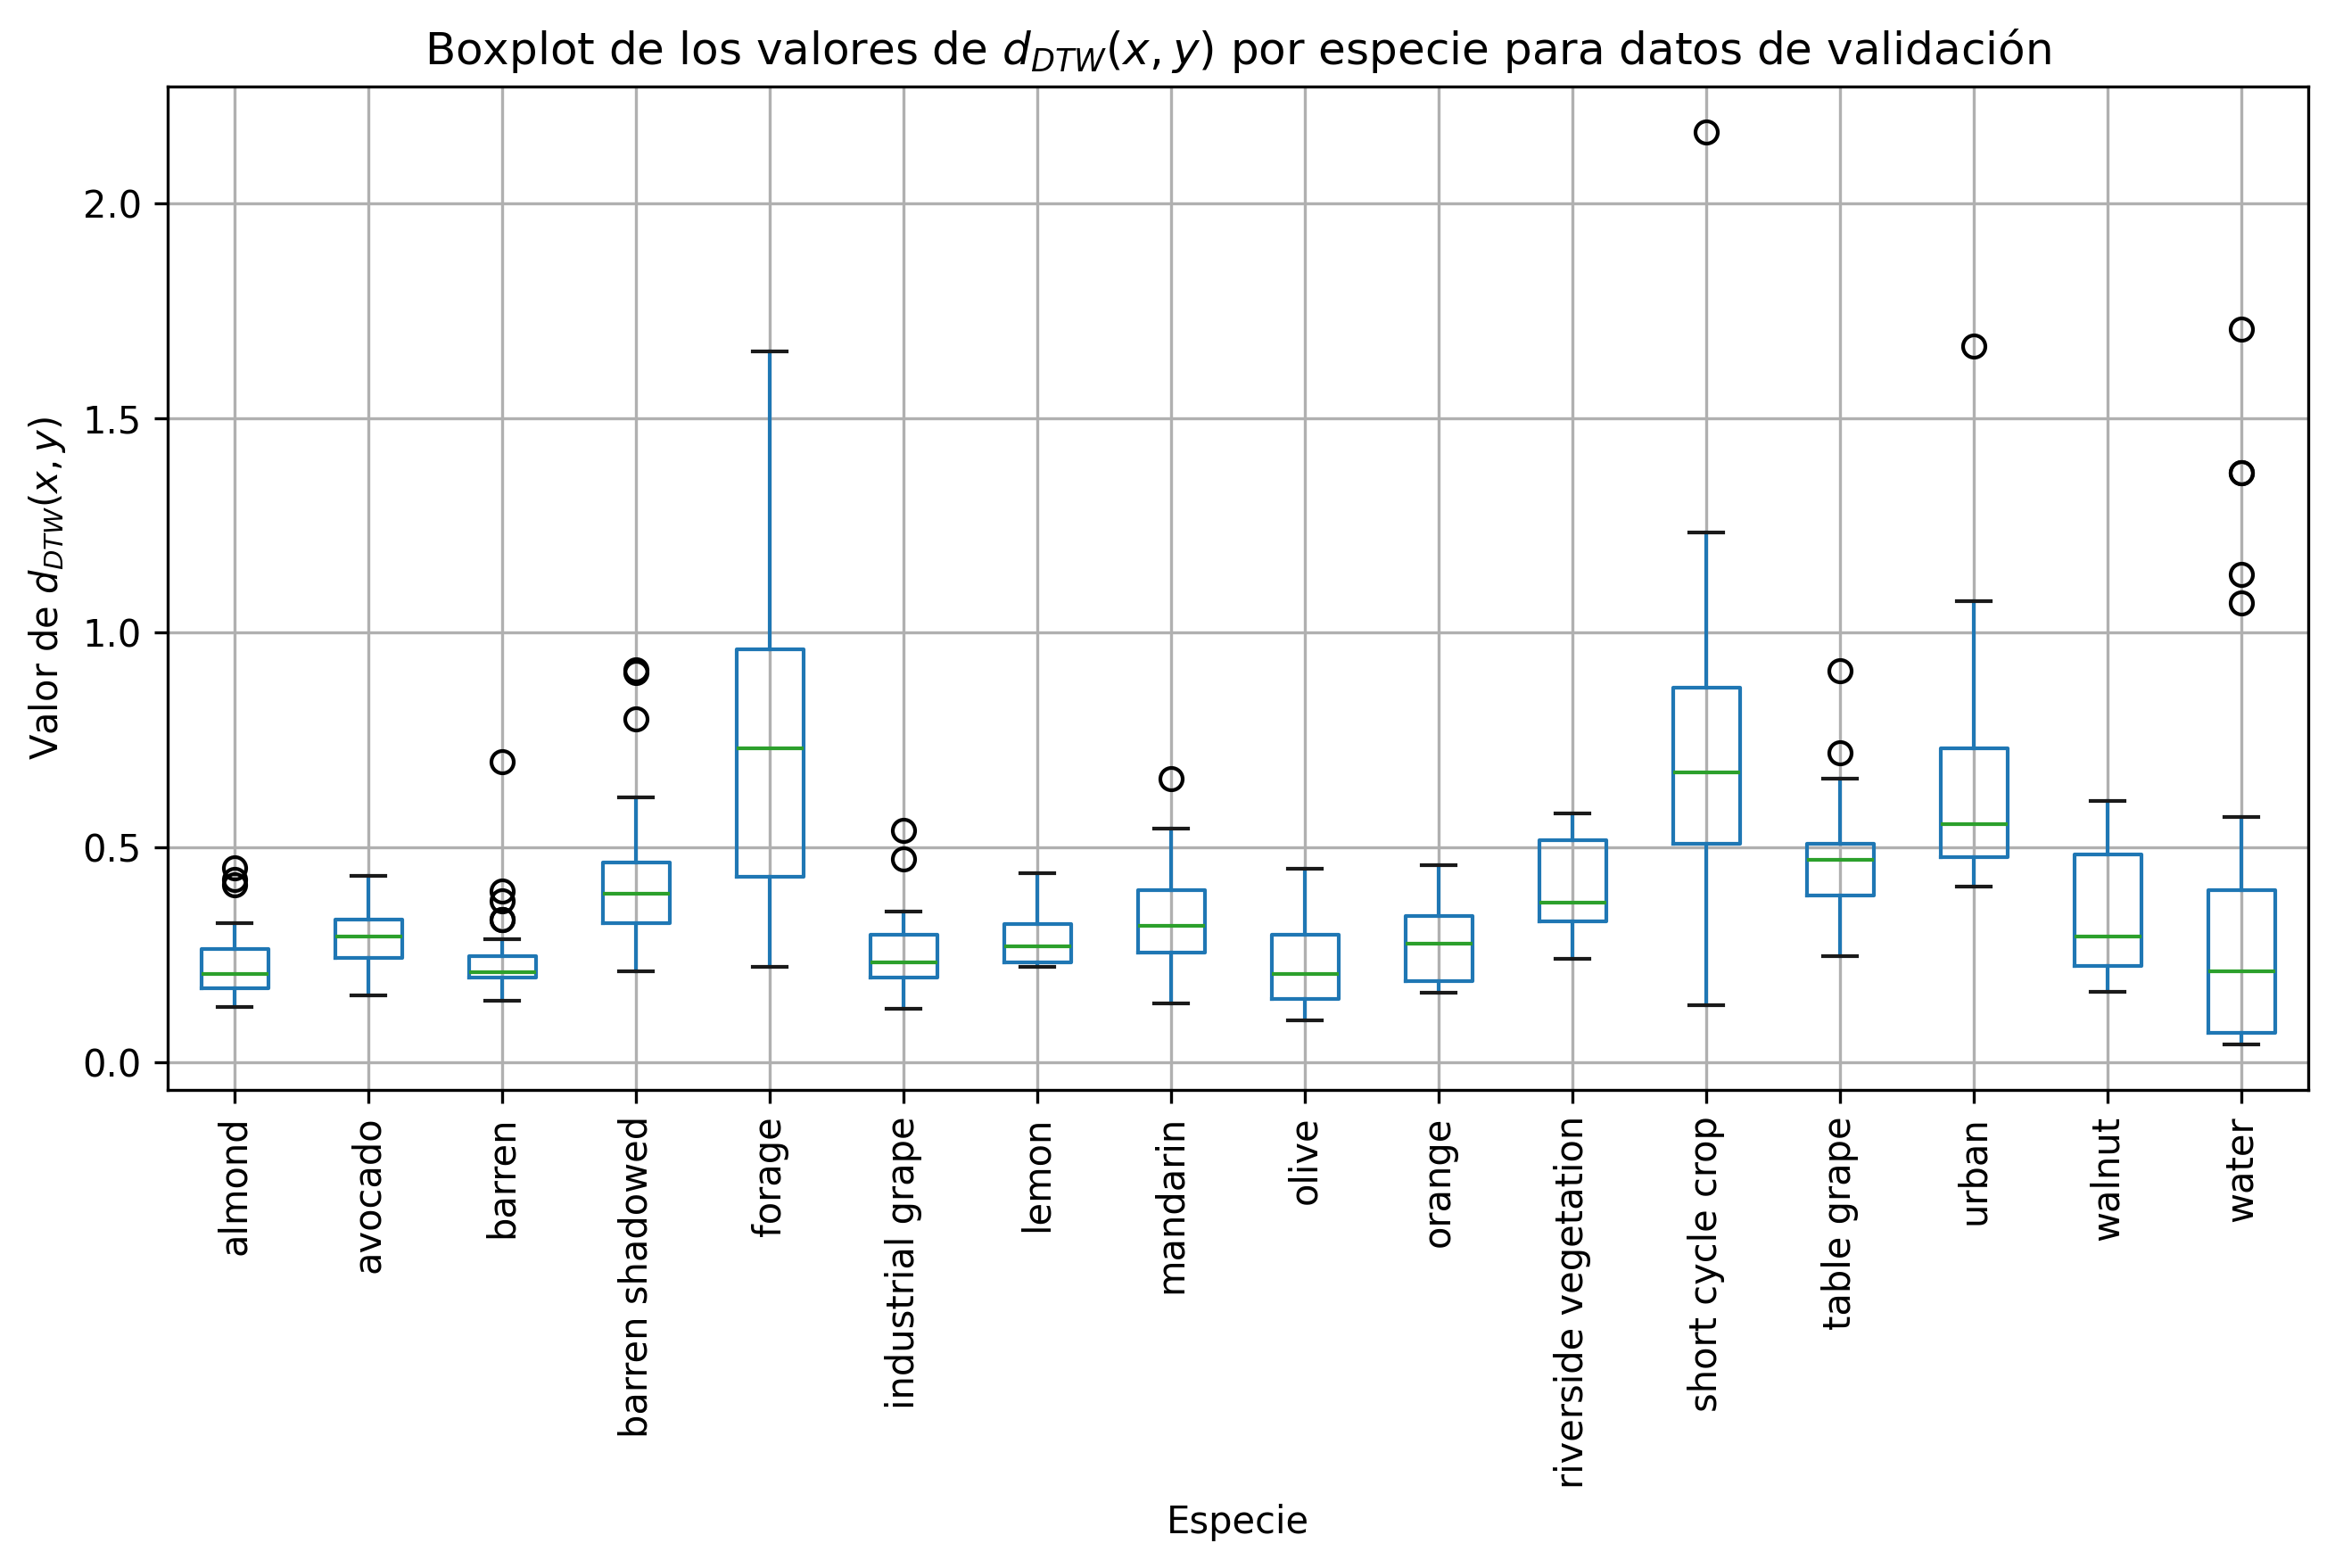

In [317]:
plt.rcParams['figure.figsize'] = 10,5
# create a boxplot of the scores, grouped by specie_test
dfr2.reset_index(drop=True).boxplot(column='score', by='specie_test')
# remove the main title
plt.suptitle('')
# set the title of the plot
plt.title('Boxplot de los valores de $d_{DTW}(x,y)$ por especie para datos de validación')
plt.xlabel('Especie')
plt.ylabel('Valor de $d_{DTW}(x,y)$')
# set xticklabels to the species names
plt.xticks(range(1, len(labels_dict)+1), labels_dict2.values(), rotation=90)
plt.show()

In [318]:
dfr

,id,id_test,id_train,specie_test,specie_train,score
0,1,1322,2,almond,olive,0.486597
1,1,1322,3,almond,olive,0.444548
2,1,1322,4,almond,olive,0.550083
3,1,1322,7,almond,olive,0.603357
4,1,1322,11,almond,olive,0.425929
...,...,...,...,...,...,...
583195,480,2234,2673,water,riverside vegetation,2.459488
583196,480,2234,2677,water,riverside vegetation,2.420637
583197,480,2234,2678,water,riverside vegetation,2.271317
583198,480,2234,2682,water,riverside vegetation,2.150672


In [324]:
# group by id_test and keep the 3 first min score row
dfr3 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(3)['specie_train'].mode())

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/3332195550.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr3 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(3)['specie_train'].mode())


In [326]:
# left join dfr2(only id_test and specie_test) and dfr3 by id
dfr3 = dfr2[['id', 'specie_test']].merge(dfr3, on='id', how='left')


In [328]:
dfr3['specie_train'] = dfr3['specie_train'].map(labels_dict)

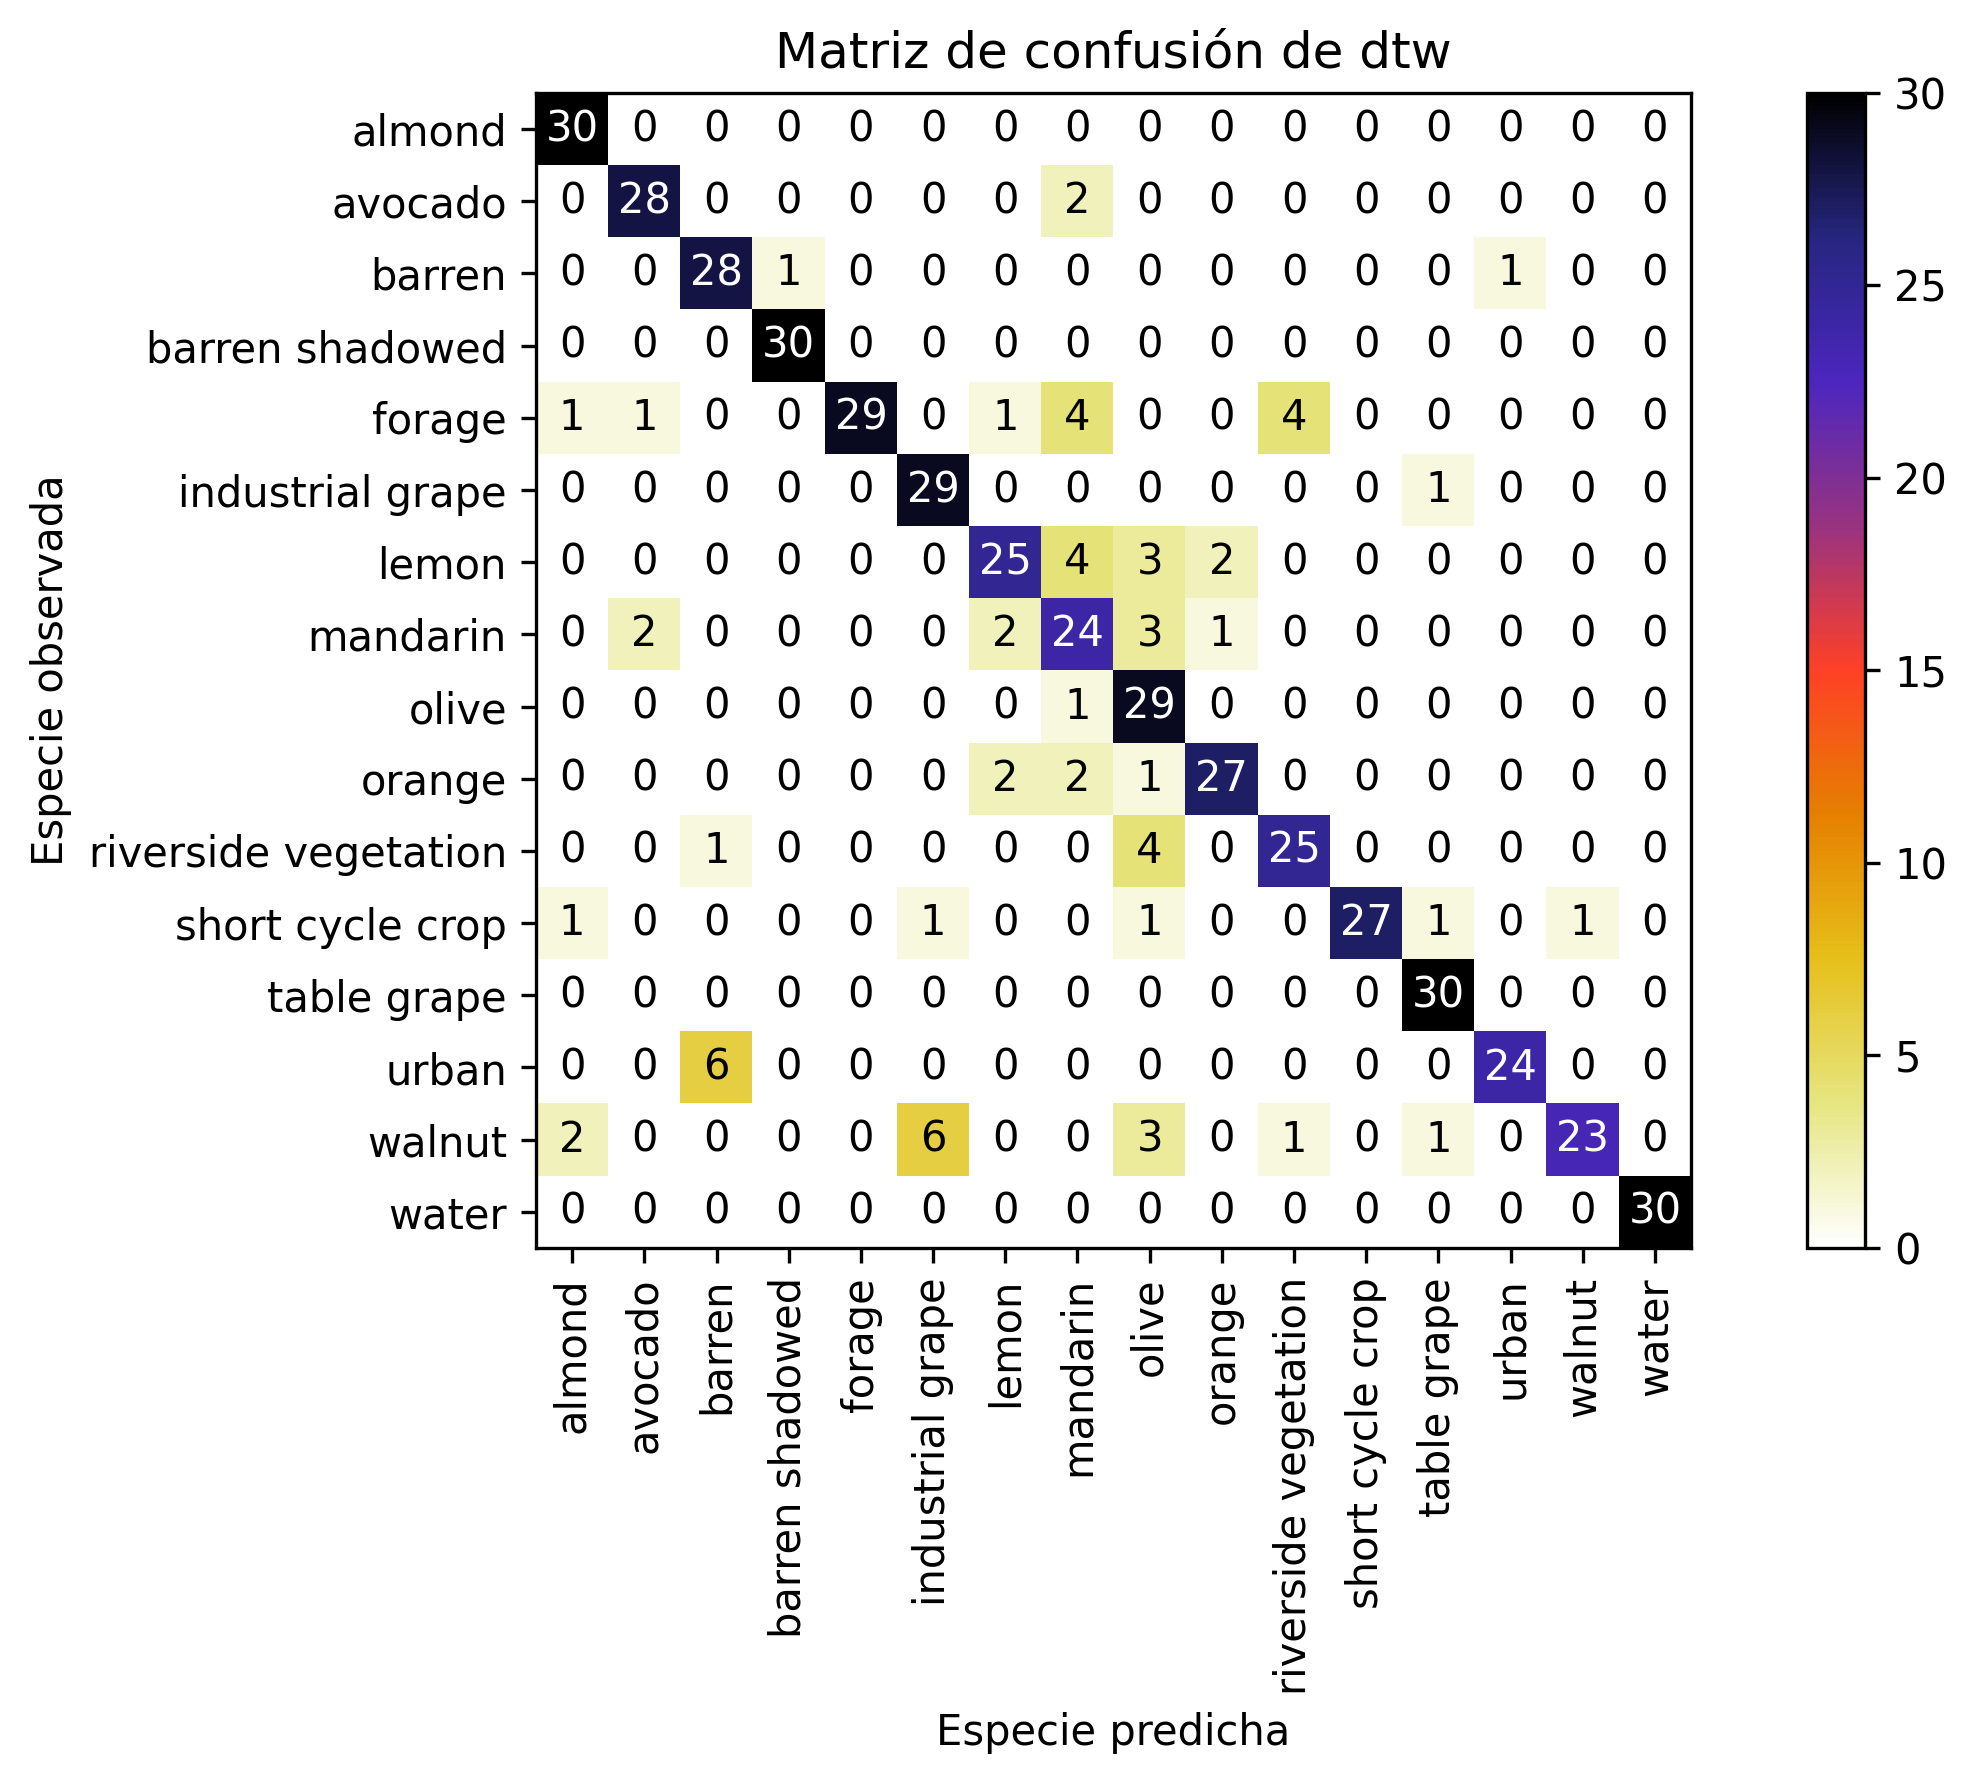

In [329]:
cm = pycm.ConfusionMatrix(actual_vector=dfr3['specie_test'].tolist(), predict_vector=dfr3['specie_train'].tolist())
cm.relabel(mapping=labels_dict2)
cm.plot(cmap=plt.cm.CMRmap_r, number_label=True, plot_lib="matplotlib")
plt.xticks(rotation=90)
plt.title('Matriz de confusión de dtw')
plt.xlabel('Especie predicha')
plt.ylabel('Especie observada')
plt.show()

In [330]:
cm.overall_stat

{'Overall ACC': 0.8656126482213439,
 'Overall RACCU': 0.06281538533643706,
 'Overall RACC': 0.06218656751394336,
 'Kappa': 0.8567014001682534,
 'Gwet AC1': 0.8566567062537302,
 'Bennett S': 0.8566534914361001,
 'Kappa Standard Error': 0.016167738917258395,
 'Kappa Unbiased': 0.8566052518618229,
 'Scott PI': 0.8566052518618229,
 'Kappa No Prevalence': 0.7312252964426877,
 'Kappa 95% CI': (0.825012631890427, 0.8883901684460798),
 'Standard Error': 0.015162322729532496,
 '95% CI': (0.8358944956714602, 0.8953308007712275),
 'Chi-Squared': 5787.802685506407,
 'Phi-Squared': 11.438345228273532,
 'Cramer V': 0.873244724319345,
 'Response Entropy': 3.9841167509187225,
 'Reference Entropy': 3.994781442021415,
 'Cross Entropy': 4.022939474116147,
 'Joint Entropy': 4.664724472265494,
 'Conditional Entropy': 0.669943030244078,
 'Mutual Information': 3.3141737206746447,
 'KL Divergence': 0.028158032094731764,
 'Lambda B': 0.8528138528138528,
 'Lambda A': 0.8540772532188842,
 'Chi-Squared DF': 225,


In [331]:
# group by id_test and keep the 3 first min score row
dfr4 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(5)['specie_train'].mode())

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/1015565298.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr4 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(5)['specie_train'].mode())


In [332]:
# left join dfr2(only id_test and specie_test) and dfr3 by id
dfr4 = dfr2[['id', 'specie_test']].merge(dfr4, on='id', how='left')

In [333]:
dfr4['specie_train'] = dfr4['specie_train'].map(labels_dict)

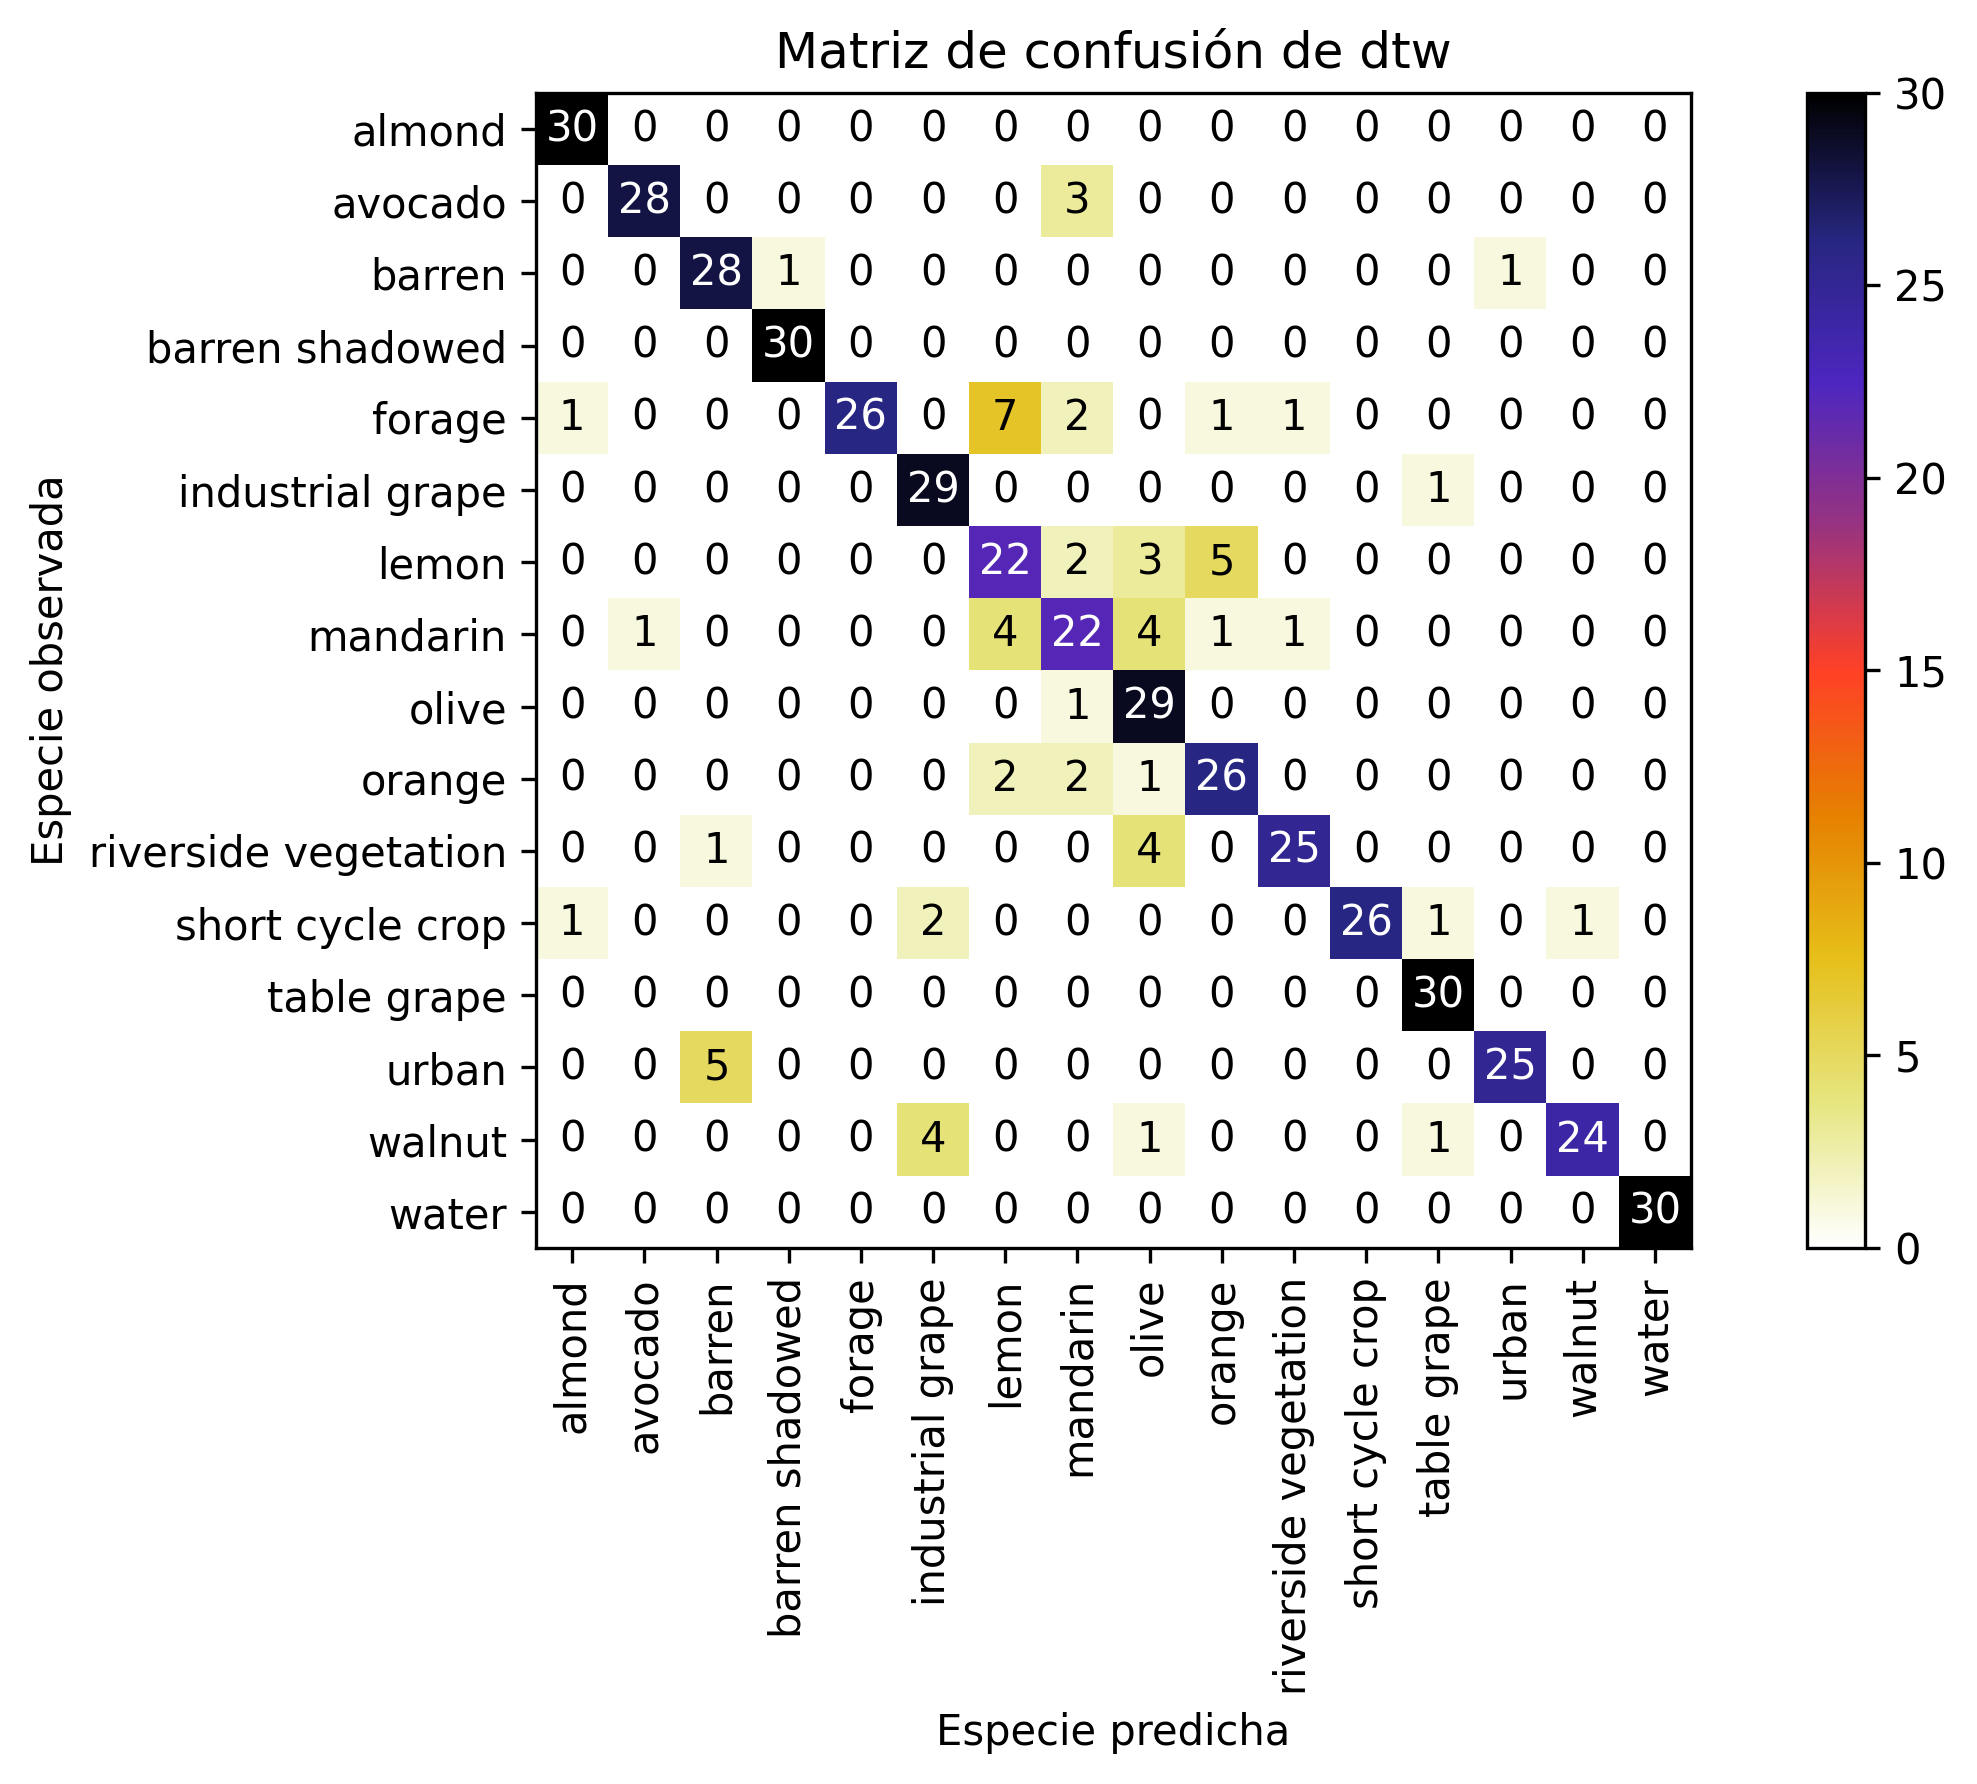

In [334]:
cm = pycm.ConfusionMatrix(actual_vector=dfr4['specie_test'].tolist(), predict_vector=dfr4['specie_train'].tolist())
cm.relabel(mapping=labels_dict2)
cm.plot(cmap=plt.cm.CMRmap_r, number_label=True, plot_lib="matplotlib")
plt.xticks(rotation=90)
plt.title('Matriz de confusión de dtw')
plt.xlabel('Especie predicha')
plt.ylabel('Especie observada')
plt.show()

In [335]:
cm.overall_stat

{'Overall ACC': 0.8669354838709677,
 'Overall RACCU': 0.06280485822060354,
 'Overall RACC': 0.062361797606659726,
 'Kappa': 0.8580854365901662,
 'Gwet AC1': 0.8580675930542608,
 'Bennett S': 0.8580645161290322,
 'Kappa Standard Error': 0.016264787262387604,
 'Kappa Unbiased': 0.8580183462364193,
 'Scott PI': 0.8580183462364193,
 'Kappa No Prevalence': 0.7338709677419355,
 'Kappa 95% CI': (0.8262064535558865, 0.889964419624446),
 'Standard Error': 0.015250485891015209,
 '95% CI': (0.8370445315245779, 0.8968264362173576),
 'Chi-Squared': 5717.979749721425,
 'Phi-Squared': 11.528184979277066,
 'Cramer V': 0.8766673629633636,
 'Response Entropy': 3.986027340447843,
 'Reference Entropy': 3.997152586600141,
 'Cross Entropy': 4.016992969388373,
 'Joint Entropy': 4.641165294309574,
 'Conditional Entropy': 0.6440127077094332,
 'Mutual Information': 3.3420146327384095,
 'KL Divergence': 0.01984038278823214,
 'Lambda B': 0.8546255506607929,
 'Lambda A': 0.8558951965065502,
 'Chi-Squared DF': 225,

In [360]:
# group by id_test and keep the 3 first min score row
dfr5 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(5))

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/3326512279.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr5 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(5))


In [361]:
dfr5 = dfr5.reset_index(drop=True)

In [362]:
# group by id and specie_train, sum score value in a new column
dfr5['score_sum'] = dfr5.groupby(['id'])['score'].transform('sum')

In [363]:
dfr5['score_norm'] = dfr5['score'] / dfr5['score_sum']

In [364]:
# group by id_test and specie_train, sum score_norm value and divide by the number of rows, put it in a new column
dfr5['score_norm_mean'] = dfr5.groupby(['id', 'specie_train'])['score_norm'].transform('mean')

In [359]:
# now choose the row with the min score_norm_mean for each id_test
dfr5 = dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()])

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/3252903713.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr5 = dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()])


In [367]:
dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()])

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/83935736.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()])


id  id_test  id_train specie_test specie_train     score  \
id                                                                    
1   0       1     1322      1305      almond       almond  0.205963   
    1       1     1322      1323      almond       almond  0.220630   
    2       1     1322      1297      almond       almond  0.225635   
    3       1     1322      1324      almond       almond  0.245098   
    4       1     1322      1332      almond       almond  0.255263   
...       ...      ...       ...         ...          ...       ...   
480 2395  480     2234      1795       water        water  0.570987   
    2396  480     2234      2104       water        water  0.582328   
    2397  480     2234      1794       water        water  0.582729   
    2398  480     2234      1797       water        water  0.605073   
    2399  480     2234      1803       water        water  0.618064   

          score_sum  score_norm  score_norm_mean  
id                                                
1   0      1.152589    0.178696              0.2  
    1      1.152589    0.191421              0.2  
    2      1.152589    0.195763              0.2  
    3      1.152589    0.212650              0.2  
    4      1.152589    0.221469              0.2  
...             ...         ...              ...  
480 2395   2.959182    0.192954              0.2  
    2396   2.959182    0.196787              0.2  
    2397   2.959182    0.196922              0.2  
    2398   2.959182    0.204473              0.2  
    2399   2.959182    0.208863              0.2  

[2055 rows x 9 columns]

In [372]:
dfr5 = dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()].iloc[0,:])

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/2448054770.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr5 = dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()].iloc[0,:])


In [373]:
dfr5 = dfr5.reset_index(drop=True)
# convert labels to integers
dfr5['specie_test'] = dfr5['specie_test'].map(labels_dict)
dfr5['specie_train'] = dfr5['specie_train'].map(labels_dict)

In [374]:
cm = pycm.ConfusionMatrix(actual_vector=dfr5['specie_test'].tolist(), predict_vector=dfr5['specie_train'].tolist())

In [375]:
cm.relabel(mapping=labels_dict2)

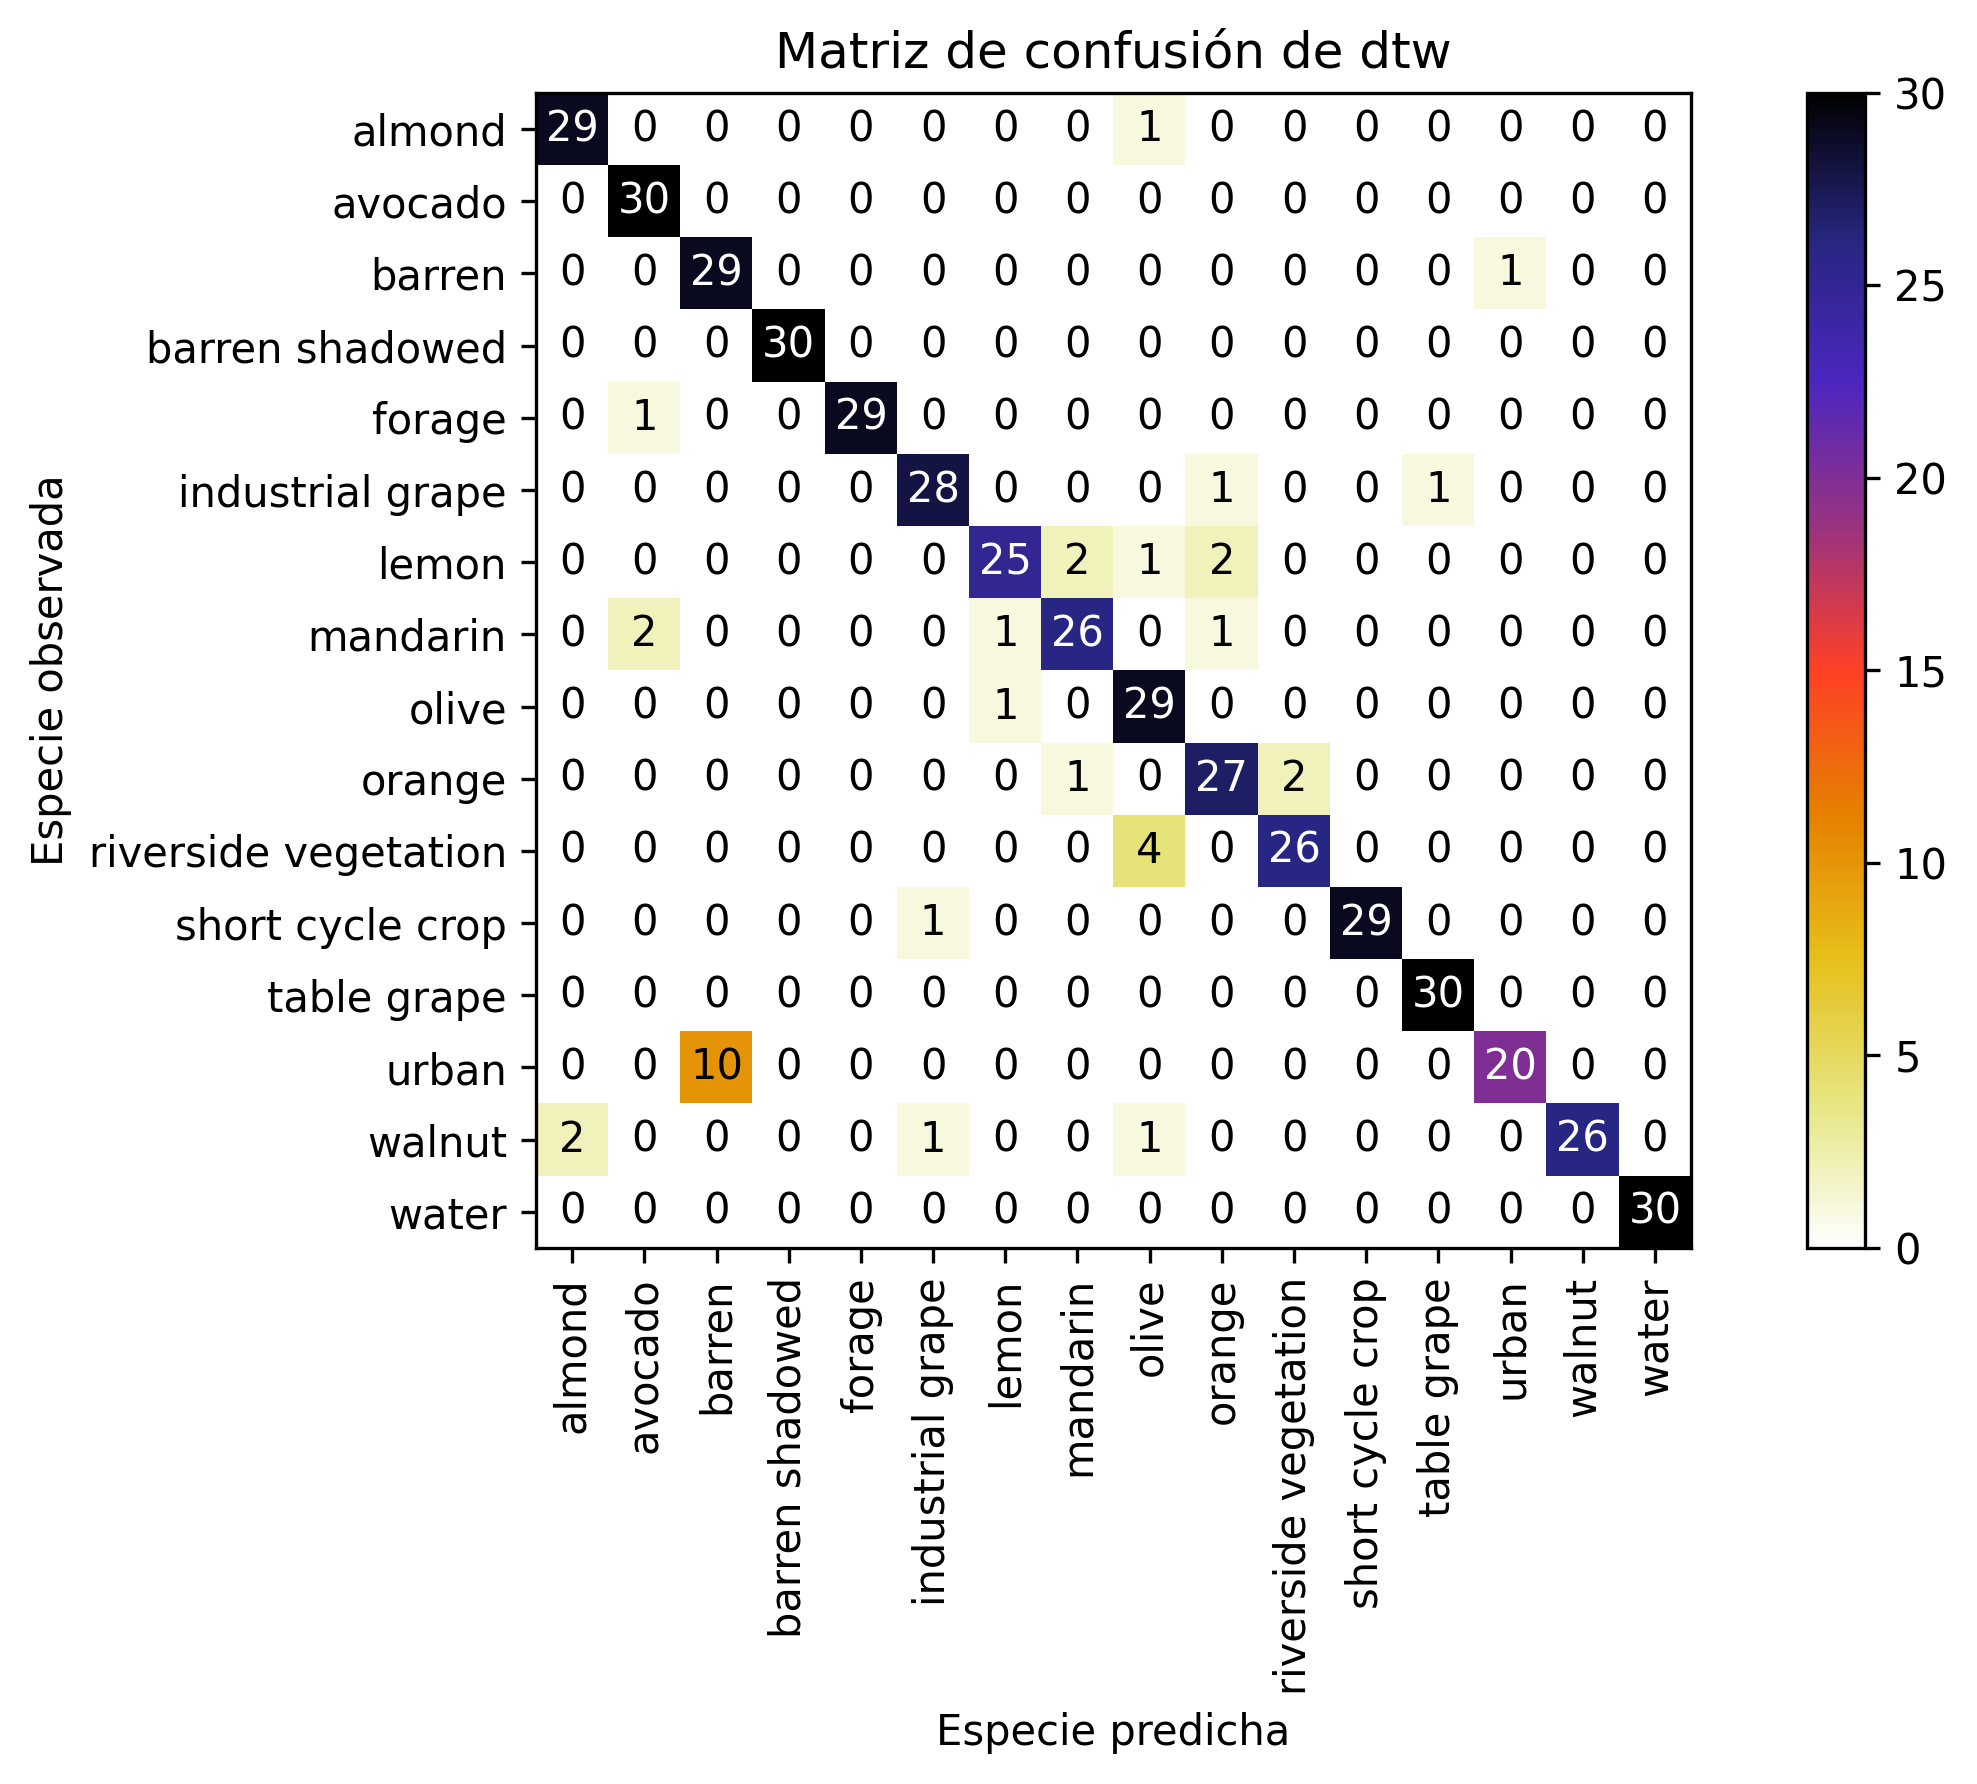

In [376]:
cm.plot(cmap=plt.cm.CMRmap_r, number_label=True, plot_lib="matplotlib")
plt.xticks(rotation=90)
plt.title('Matriz de confusión de dtw')
plt.xlabel('Especie predicha')
plt.ylabel('Especie observada')
plt.show()

In [377]:
cm.overall_stat

{'Overall ACC': 0.9229166666666667,
 'Overall RACCU': 0.06276258680555555,
 'Overall RACC': 0.0625,
 'Kappa': 0.9177777777777778,
 'Gwet AC1': 0.917779313071469,
 'Bennett S': 0.9177777777777778,
 'Kappa Standard Error': 0.01298582639814649,
 'Kappa Unbiased': 0.9177547414900934,
 'Scott PI': 0.9177547414900934,
 'Kappa No Prevalence': 0.8458333333333334,
 'Kappa 95% CI': (0.8923255580374106, 0.943229997518145),
 'Standard Error': 0.012174212248262335,
 '95% CI': (0.8990552106600725, 0.9467781226732609),
 'Chi-Squared': 6172.15244367547,
 'Phi-Squared': 12.858650924323895,
 'Cramer V': 0.9258743948046767,
 'Response Entropy': 3.9878161195683655,
 'Reference Entropy': 4.0,
 'Cross Entropy': 4.012395307597717,
 'Joint Entropy': 4.372285258632392,
 'Conditional Entropy': 0.3722852586323916,
 'Mutual Information': 3.6155308609359738,
 'KL Divergence': 0.012395307597716215,
 'Lambda B': 0.9160997732426304,
 'Lambda A': 0.9177777777777778,
 'Chi-Squared DF': 225,
 'Overall J': (13.7877743536

In [381]:
# group by id_test and keep the 3 first min score row
dfr6 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(3))
dfr6 = dfr6.reset_index(drop=True)

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/2239189536.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr6 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(3))


In [382]:
# group by id and specie_train, sum score value in a new column
dfr6['score_sum'] = dfr6.groupby(['id'])['score'].transform('sum')
dfr6['score_norm'] = dfr6['score'] / dfr6['score_sum']

In [383]:
# group by id_test and specie_train, sum score_norm value and divide by the number of rows, put it in a new column
dfr6['score_norm_mean'] = dfr6.groupby(['id', 'specie_train'])['score_norm'].transform('mean')
# now choose the row with the min score_norm_mean for each id_test
dfr6 = dfr6.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()].iloc[0, :])

/var/folders/t_/cbcq4k9d14l8g47hw5wpkrbw0000gn/T/ipykernel_33523/1505327813.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfr6 = dfr6.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()].iloc[0, :])


In [384]:
dfr6 = dfr6.reset_index(drop=True)
# convert labels to integers
dfr6['specie_test'] = dfr6['specie_test'].map(labels_dict)
dfr6['specie_train'] = dfr6['specie_train'].map(labels_dict)

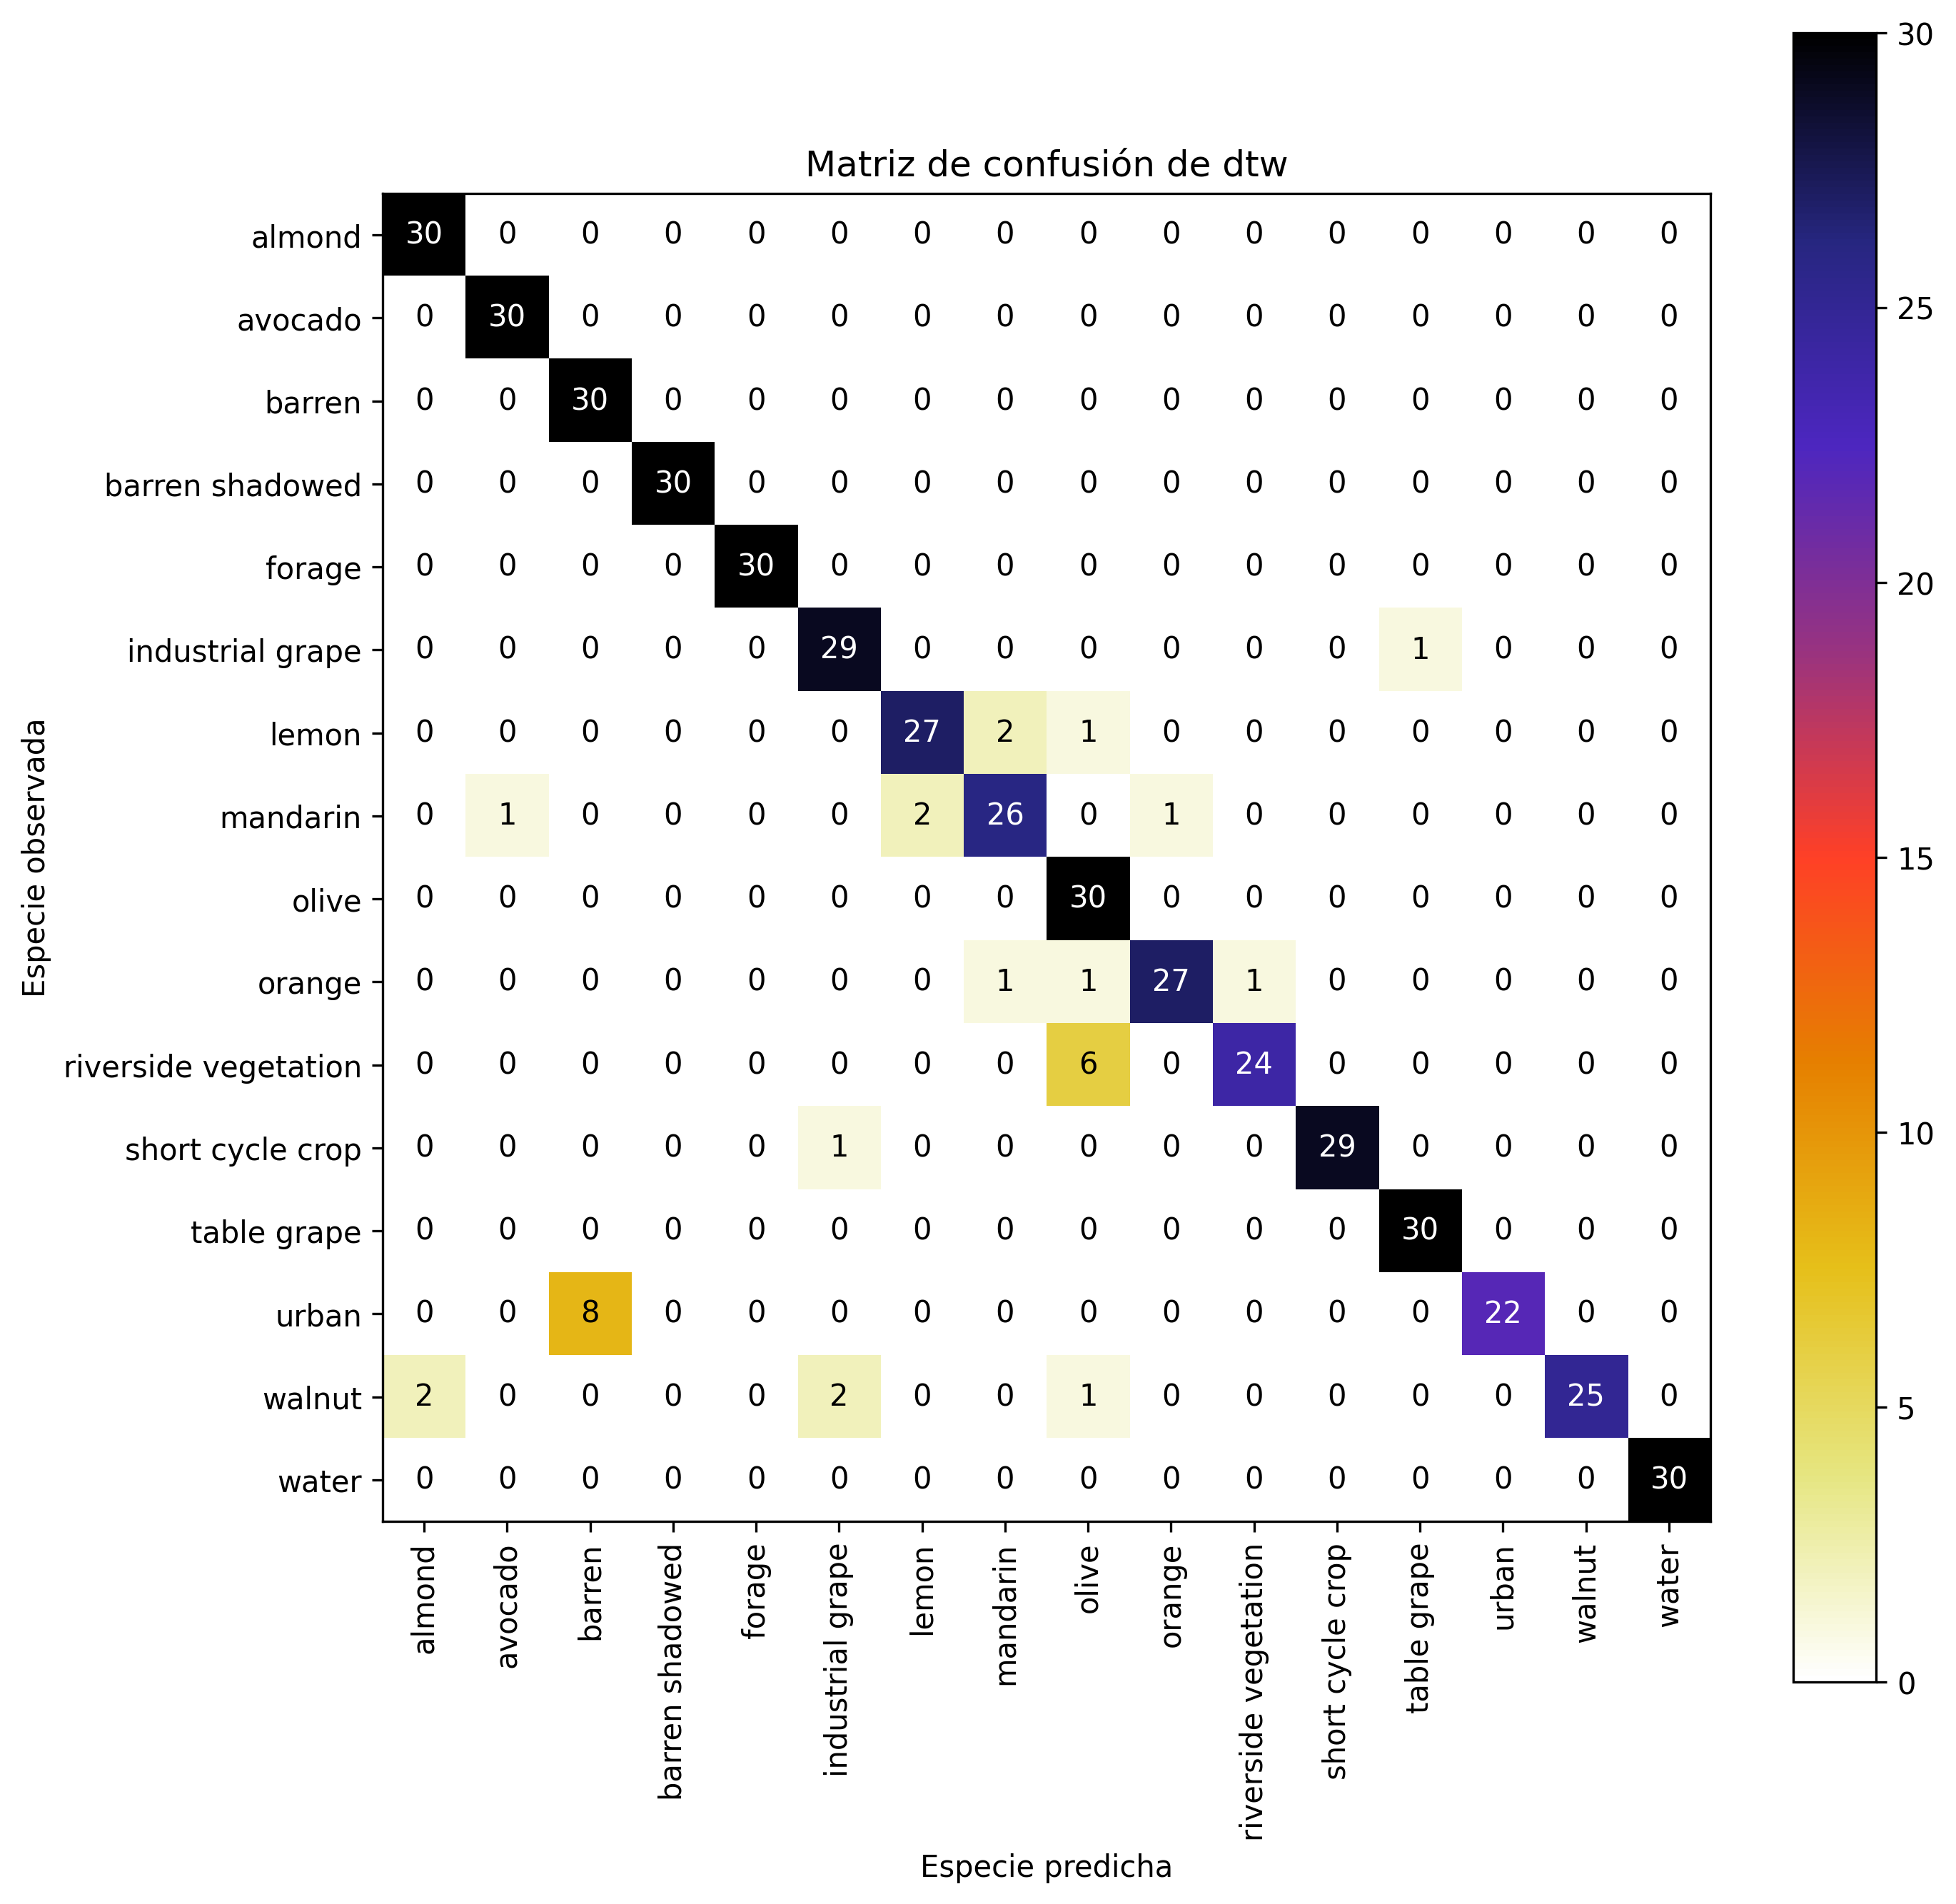

In [387]:
plt.rcParams['figure.figsize'] = 10,10
cm = pycm.ConfusionMatrix(actual_vector=dfr6['specie_test'].tolist(), predict_vector=dfr6['specie_train'].tolist())
cm.relabel(mapping=labels_dict2)
cm.plot(cmap=plt.cm.CMRmap_r, number_label=True, plot_lib="matplotlib")
plt.xticks(rotation=90)
plt.title('Matriz de confusión de dtw')
plt.xlabel('Especie predicha')
plt.ylabel('Especie observada')
plt.show()

In [386]:
cm.overall_stat

{'Overall ACC': 0.9354166666666667,
 'Overall RACCU': 0.06279947916666666,
 'Overall RACC': 0.0625,
 'Kappa': 0.9311111111111111,
 'Gwet AC1': 0.9311125781580577,
 'Bennett S': 0.9311111111111111,
 'Kappa Standard Error': 0.011966603046703196,
 'Kappa Unbiased': 0.9310890979062756,
 'Scott PI': 0.9310890979062756,
 'Kappa No Prevalence': 0.8708333333333333,
 'Kappa 95% CI': (0.9076565691395728, 0.9545656530826494),
 'Standard Error': 0.011218690356284247,
 '95% CI': (0.9134280335683496, 0.9574052997649838),
 'Chi-Squared': 6338.750810379248,
 'Phi-Squared': 13.205730854956766,
 'Cramer V': 0.9382867669306211,
 'Response Entropy': 3.986301332300799,
 'Reference Entropy': 4.0,
 'Cross Entropy': 4.013713342762756,
 'Joint Entropy': 4.302422316800263,
 'Conditional Entropy': 0.302422316800263,
 'Mutual Information': 3.683879015500536,
 'KL Divergence': 0.013713342762755591,
 'Lambda B': 0.9297052154195011,
 'Lambda A': 0.9311111111111111,
 'Chi-Squared DF': 225,
 'Overall J': (14.120599614

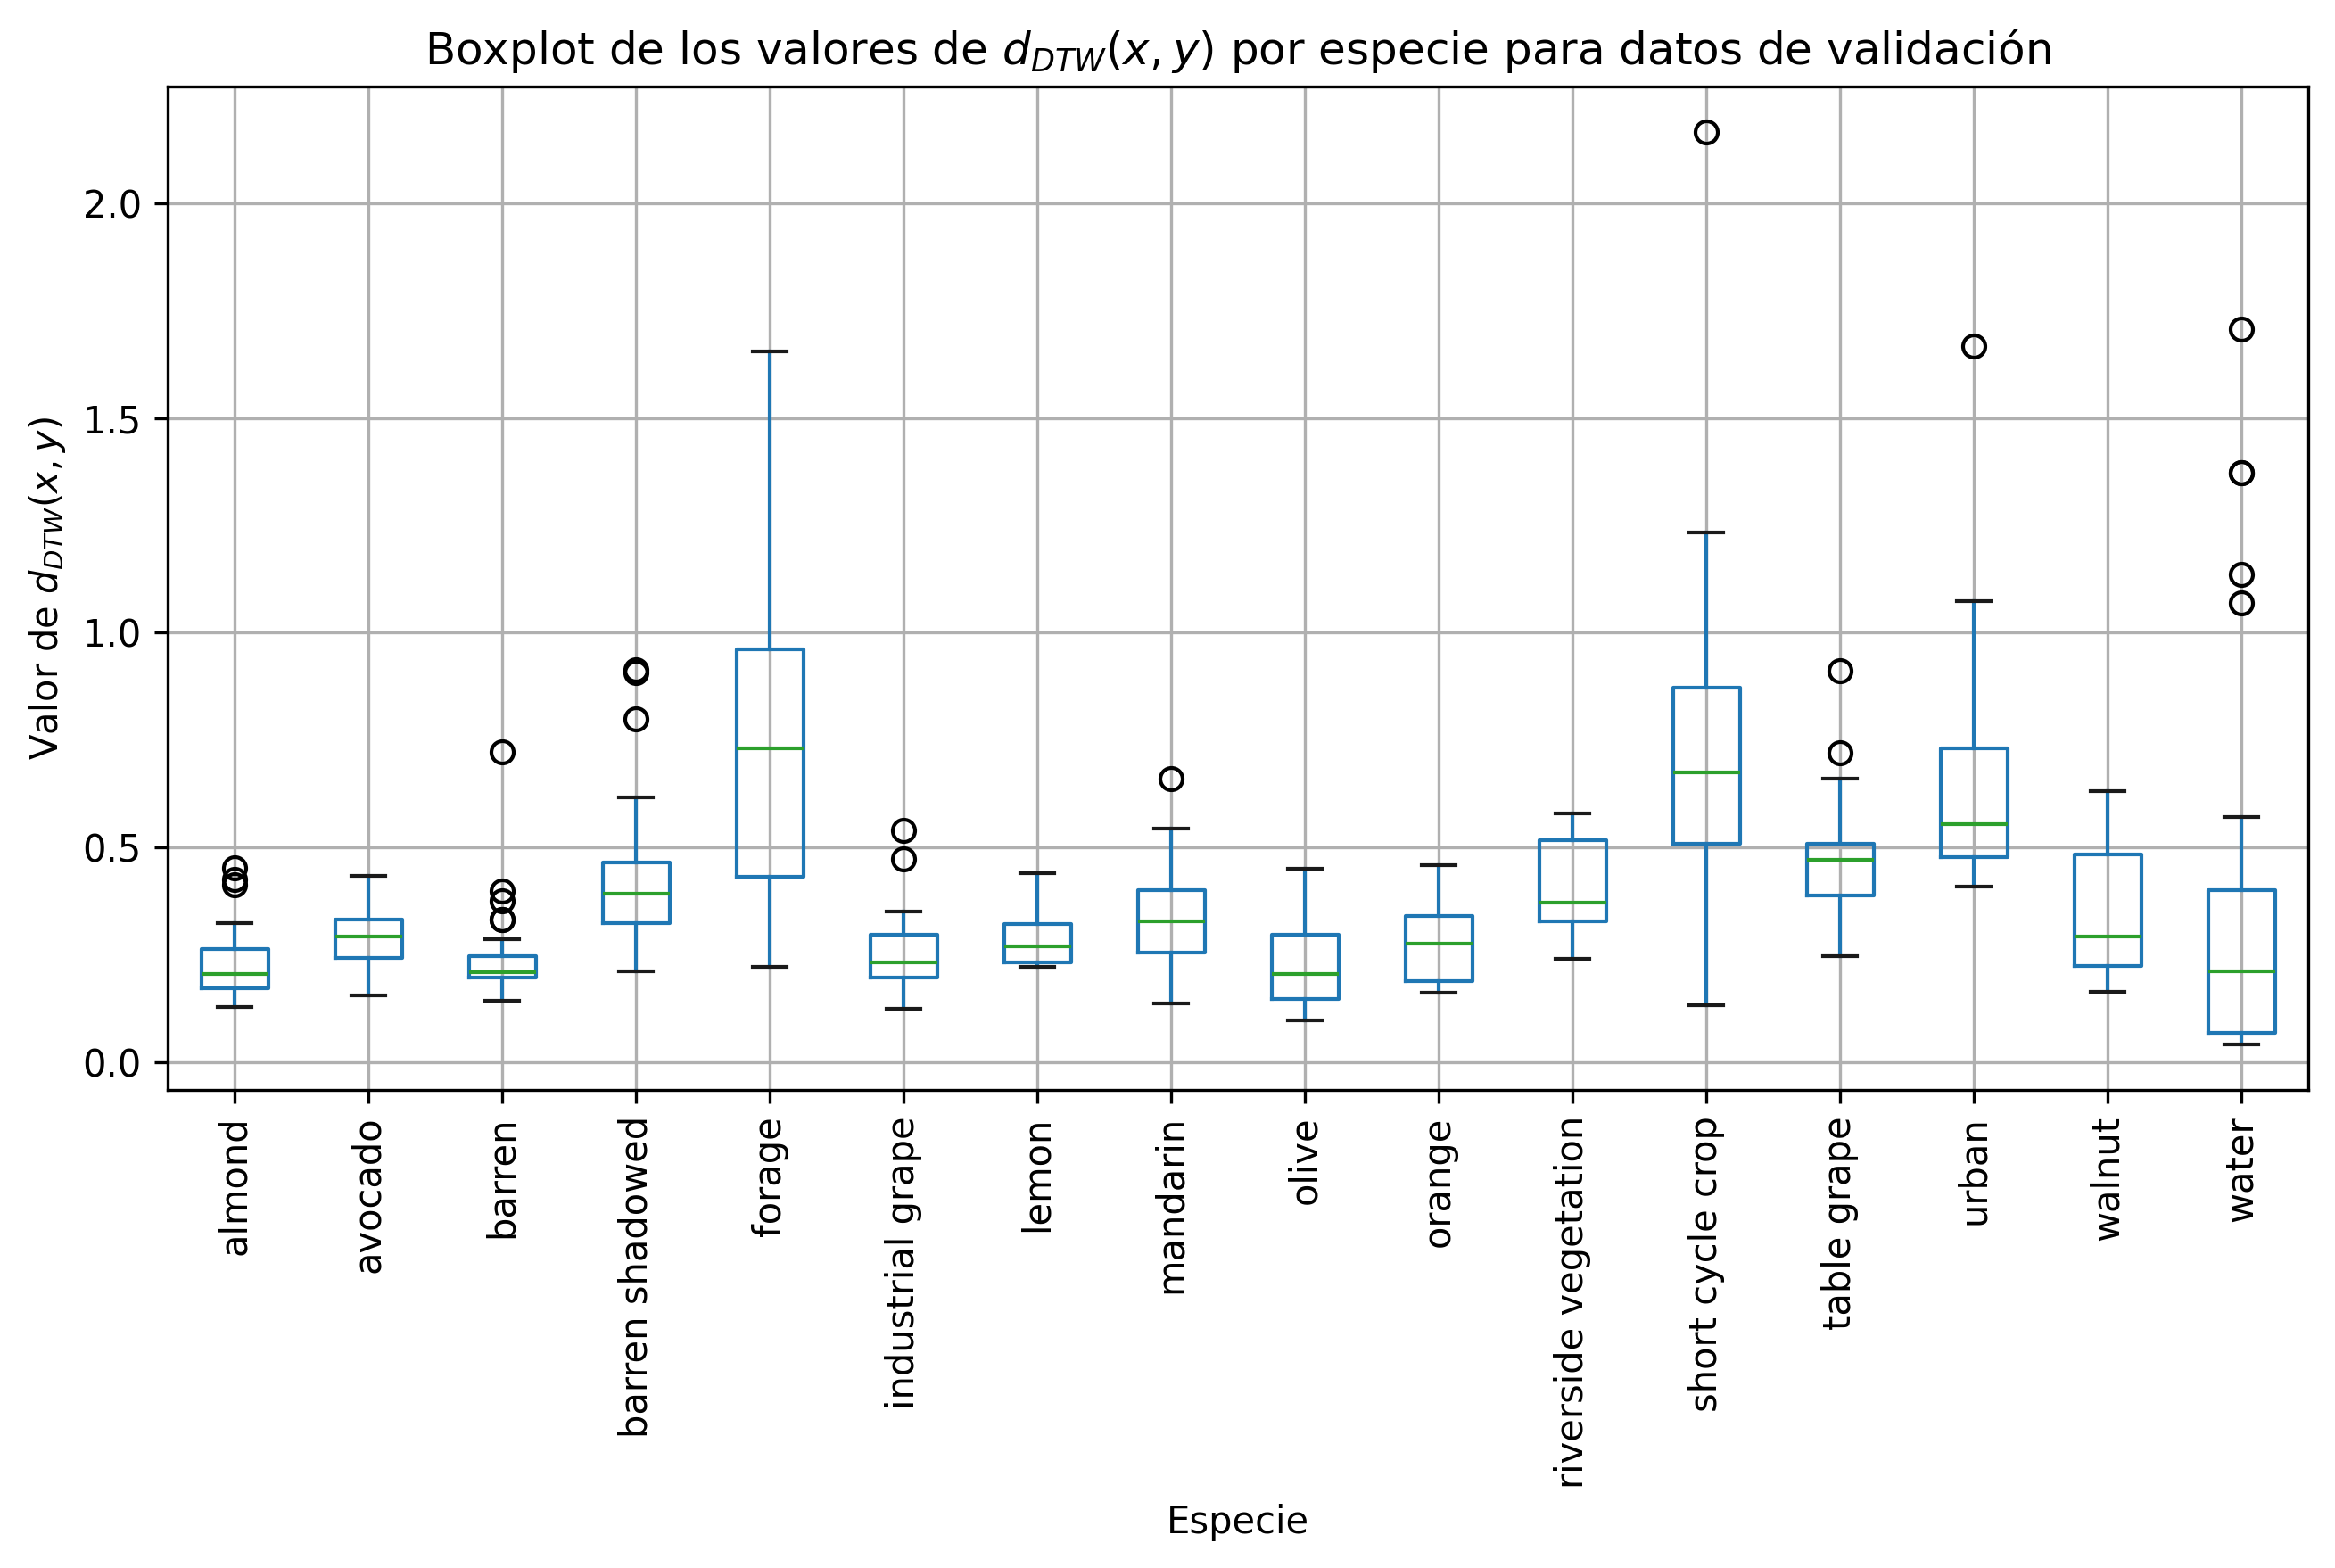

In [388]:
plt.rcParams['figure.figsize'] = 10,5
# create a boxplot of the scores, grouped by specie_test
dfr6.reset_index(drop=True).boxplot(column='score', by='specie_test')
# remove the main title
plt.suptitle('')
# set the title of the plot
plt.title('Boxplot de los valores de $d_{DTW}(x,y)$ por especie para datos de validación')
plt.xlabel('Especie')
plt.ylabel('Valor de $d_{DTW}(x,y)$')
# set xticklabels to the species names
plt.xticks(range(1, len(labels_dict)+1), labels_dict2.values(), rotation=90)
plt.show()

In [390]:
dfr.to_csv('../dtw/raw_all.csv')
dfr2.to_csv('../dtw/dtw_all_1.csv')
dfr3.to_csv('../dtw/dtw_all_2.csv')
dfr4.to_csv('../dtw/dtw_all_3.csv')
dfr5.to_csv('../dtw/dtw_all_4.csv')
dfr6.to_csv('../dtw/dtw_all_5.csv')

# Análisis NDVI

In [27]:
results = []

for i in test_ids:
    tid = db_test[db_test['nID'] == i]['ID'].to_list()[0]
    X, specie_x = load_and_transform_ndvi(tid, db_test)
    for id in train_ids:
        Y, specie_y = load_and_transform_ndvi(id, db)
        score = dtw_functions.dtw(X, Y, type_dtw="d", local_dissimilarity=d.euclidean)
        results.append({'id': i,'id_test': tid, 'id_train': id, 'specie_test': specie_x, 'specie_train': specie_y, 'score': score})
    print(f'{i} done')

/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aldotapia/miniforge3/envs/dtw/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of Sci

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done



KeyboardInterrupt



In [ ]:
dfr = pd.DataFrame(results)

In [ ]:
dfr

In [ ]:
dfr2 = dfr.groupby(['id']).apply(lambda x: x[x['score'] == x['score'].min()])

dfr2 = dfr2.reset_index(drop=True)

In [ ]:
labels = sorted(dfr2['specie_test'].unique())
labels_dict = dict(zip(labels, range(len(labels))))
labels_dict2 = {v: k for k, v in labels_dict.items()}

In [ ]:
dfr2['specie_test'] = dfr2['specie_test'].map(labels_dict)
dfr2['specie_train'] = dfr2['specie_train'].map(labels_dict)

In [ ]:
dfr3 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(3)['specie_train'].mode())
dfr3 = dfr2[['id', 'specie_test']].merge(dfr3, on='id', how='left')
dfr3['specie_train'] = dfr3['specie_train'].map(labels_dict)

In [ ]:
dfr4 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(5)['specie_train'].mode())
dfr4 = dfr2[['id', 'specie_test']].merge(dfr4, on='id', how='left')
dfr4['specie_train'] = dfr4['specie_train'].map(labels_dict)

In [ ]:
dfr5 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(5))
dfr5 = dfr5.reset_index(drop=True)
dfr5['score_sum'] = dfr5.groupby(['id'])['score'].transform('sum')
dfr5['score_norm'] = dfr5['score'] / dfr5['score_sum']
dfr5['score_norm_mean'] = dfr5.groupby(['id', 'specie_train'])['score_norm'].transform('mean')
dfr5 = dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()])
dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()])
dfr5 = dfr5.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()].iloc[0,:])
dfr5 = dfr5.reset_index(drop=True)
# convert labels to integers
dfr5['specie_test'] = dfr5['specie_test'].map(labels_dict)
dfr5['specie_train'] = dfr5['specie_train'].map(labels_dict)

In [ ]:
dfr6 = dfr.groupby(['id']).apply(lambda x: x.sort_values(by=['score']).head(3))
dfr6 = dfr6.reset_index(drop=True)
dfr6['score_sum'] = dfr6.groupby(['id'])['score'].transform('sum')
dfr6['score_norm'] = dfr6['score'] / dfr6['score_sum']
dfr6['score_norm_mean'] = dfr6.groupby(['id', 'specie_train'])['score_norm'].transform('mean')
dfr6 = dfr6.groupby(['id']).apply(lambda x: x[x['score_norm_mean'] == x['score_norm_mean'].min()].iloc[0, :])
dfr6 = dfr6.reset_index(drop=True)
# convert labels to integers
dfr6['specie_test'] = dfr6['specie_test'].map(labels_dict)
dfr6['specie_train'] = dfr6['specie_train'].map(labels_dict)